# Neuronales Netzwerk - W3_Croissants

Baisert Basiert auf Kopie von neural_net_estimation_with_dropout.ipynb.

## Importing the Data

We will start by importing the data and taking a look at the first few rows.

In [37]:

# Import the necessary libraries
import pandas as pd
import requests
import io
%pip install tensorflow

# Define the file paths
subdirectory = "pickle_data//W5_Kuchen"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Loaded Training features dimensions: (1462, 14)
Loaded Validation features dimensions: (357, 14)
Loaded Test features dimensions: (364, 14)

Loaded Training labels dimensions: (1462, 1)
Loaded Validation labels dimensions: (357, 1)
Loaded Test labels dimensions: (364, 1)

First few rows of loaded training features:
   Markt_1.0  Sonnenschein  Niederschlag  Sommer_1  Herbst_1  Winter_1  \
0          0      0.350877           0.3         1         0         0   
1          0      0.497658           0.1         1         0         0   
2          0      0.117302          10.2         1         0         0   
3          0      0.011744           0.0         1         0         0   
4          0      0.476471           0.0         1         0         0   

   Wednesday_1  Friday_1  Saturday_1  Sunday_1  Semesterferie

In [38]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[ 0.          0.35087719  0.3         1.          0.          0.
   0.          0.          0.          0.          1.          1.
   0.          1.        ]
 [ 0.          0.49765808  0.1         1.          0.          0.
   0.          0.          0.          0.          1.          1.
   0.          1.        ]
 [ 0.          0.11730205 10.2         1.          0.          0.
   1.          0.          0.          0.          1.          1.
   0.          1.        ]
 [ 0.          0.01174398  0.          1.          0.          0.
   0.          0.          0.          0.          1.          1.
   0.          1.        ]
 [ 0.          0.47647059  0.          1.          0.          0.
   0.          1.          0.          0.          1.          1.
   0.          1.        ]]


## Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dropout(.3),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 255 (1020.00 B)

 Trainable params: 227 (908.00 B)

 Non-trainable params: 28 (112.00 B)

## Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [40]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=18,
                    validation_data=(validation_features, validation_labels))

Epoch 1/18


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 87558.4219 - val_loss: 74910.0234
Epoch 2/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84966.1016 - val_loss: 74387.7812
Epoch 3/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81719.1016 - val_loss: 73540.2969
Epoch 4/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84841.4844 - val_loss: 72166.4453
Epoch 5/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84430.5703 - val_loss: 69823.7891
Epoch 6/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90822.6250 - val_loss: 65769.6953
Epoch 7/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 75145.1797 - val_loss: 58775.2422
Epoch 8/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66338.0859 - val_loss: 48444.8242
Epoch 9/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53567.2188 - val_loss: 35607.8477
Epoch 10/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40804.8203 - val_loss: 23589.9688
Epoch 11/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29890.6426 - val_loss: 16181.94

## Saving the Trained Model

After training, it's a good practice to save the model for future use.

In [41]:
model.save("python_model_W5_Kuchen.h5")

## Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

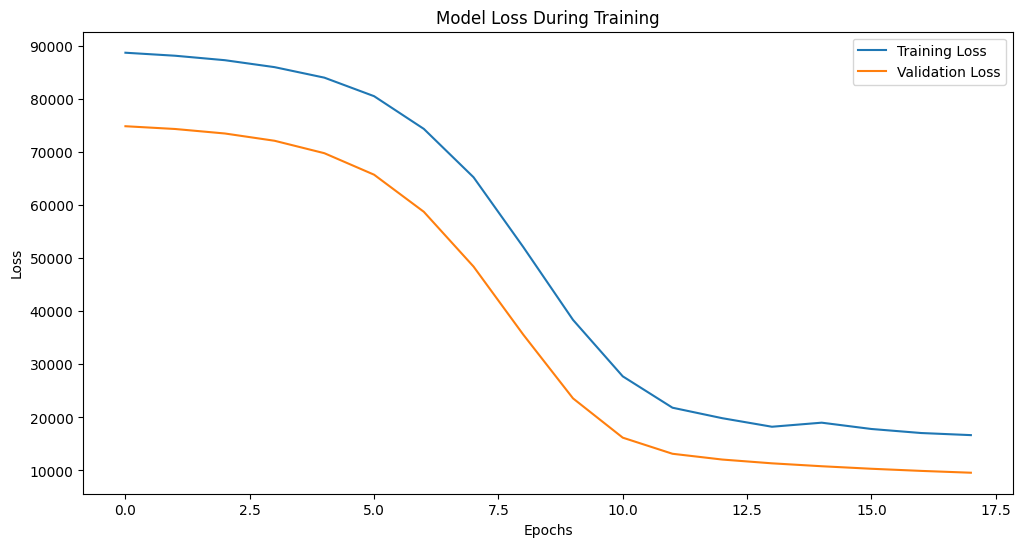

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [43]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
test_predictions = model.predict(test_features)

print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


 1/46 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE on the Training Data: 21.61%
MAPE on the Validation Data: 21.59%


## Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


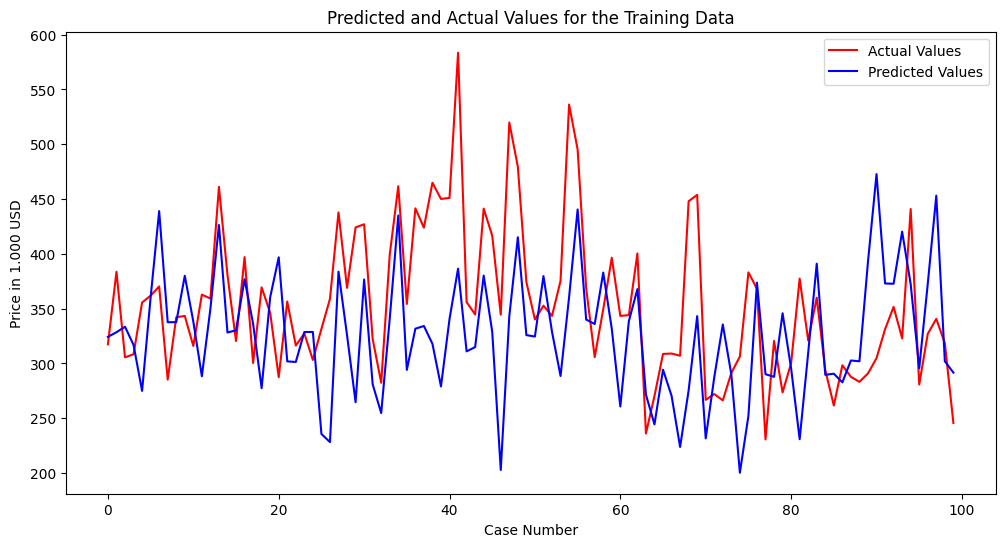

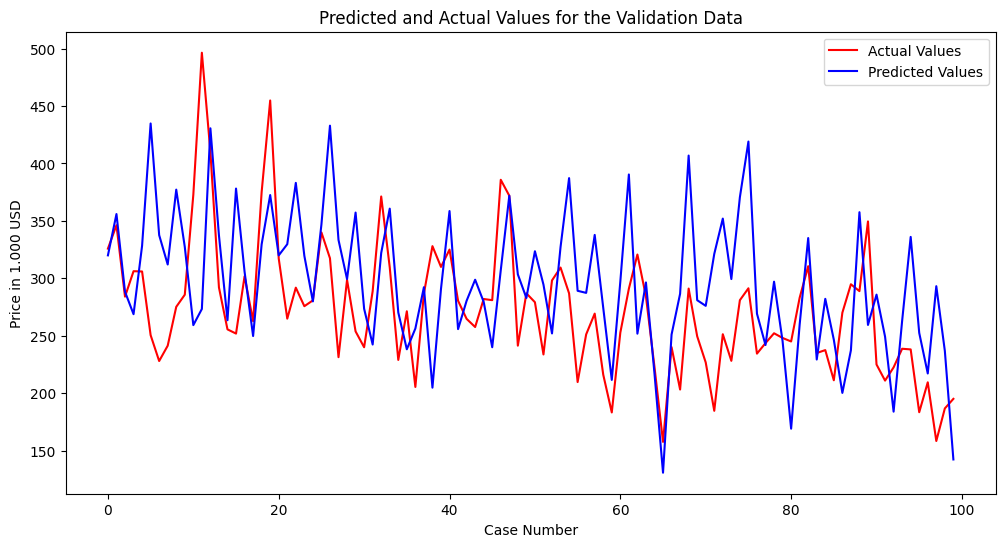

In [44]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

In [45]:
#Datum zu predicted Umsatzdaten hinzufügen

# Startdatum von test_data angeben
startdatum = np.datetime64('2018-08-01')

# Erstelle ein Array von Datumsangaben entsprechend der Länge der Umsatzdaten
datum_array = np.arange(startdatum, startdatum + len(test_predictions))

# Konvertiere das Datumsarray zu Strings
datum_array_str = datum_array.astype(str)

# Integriere Datum und Umsatzdaten in ein gemeinsames Array
date_prediction = np.column_stack((datum_array_str, test_predictions))

#print(date_prediction)

# Konvertiere das Array zu einem Pandas DataFrame
df_predictions = pd.DataFrame(date_prediction, columns=["Datum", "Umsatz"])

# Optional: Umsatzdaten zurück zu numerischen Typen konvertieren
df_predictions["Umsatz"] = pd.to_numeric(df_predictions["Umsatz"])


print(df_predictions)

#Mergen der Umsatzdaten mit test_csv

# CSV-Datei mit Warengruppe 1 einlesen
df_test_csv = pd.read_csv("/workspaces/DS_ML_Gr_1.5/0_DataPreparation/test.csv")

# Filtern der Zeilen für Warengruppe 1
warengruppe1_df = df_test_csv[df_test_csv["Warengruppe"] == 2].copy() #Bitte Warengruppenummer ändern!

# Merge der DataFrames mit Left Join auf die Spalte 'Datum'
W_df_merged = pd.merge(warengruppe1_df, df_predictions, on="Datum", how="left")

# Ergebnis als neue CSV-Datei speichern
W_df_merged.to_csv("/workspaces/DS_ML_Gr_1.5/3_Neuronal_Model/Predictions/W5_Kuchen_ID.csv", index=False)

# Ergebnis anzeigen
print(W_df_merged)

          Datum     Umsatz
0    2018-08-01  336.25055
1    2018-08-02  299.13530
2    2018-08-03  252.79964
3    2018-08-04  305.70087
4    2018-08-05  424.11328
..          ...        ...
359  2019-07-26  221.29913
360  2019-07-27  293.29437
361  2019-07-28  416.20715
362  2019-07-29  265.97906
363  2019-07-30  303.08878

[364 rows x 2 columns]
          id       Datum  Warengruppe     Umsatz
0    1808012  2018-08-01            2  336.25055
1    1808022  2018-08-02            2  299.13530
2    1808032  2018-08-03            2  252.79964
3    1808042  2018-08-04            2  305.70087
4    1808052  2018-08-05            2  424.11328
..       ...         ...          ...        ...
350  1907262  2019-07-26            2  221.29913
351  1907272  2019-07-27            2  293.29437
352  1907282  2019-07-28            2  416.20715
353  1907292  2019-07-29            2  265.97906
354  1907302  2019-07-30            2  303.08878

[355 rows x 4 columns]
